In [65]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [66]:
# Import image
img = cv.imread("/content/meme-meo-nham-hiem.jpg")
if img is None:
  print("Could not read the image.")
else:
  print('Success!')

Success!


#Part I. Core Operations

## 1.Hệ màu Input
#### Ảnh khi đc đọc ở thư viện Open-CV mặc định là ở hệ màu BGR thay vì RGB thông thường => Chuyển lại hệ màu

In [67]:
img = cv.resize(img,(700,600))
img1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Image RGB (Origin)')

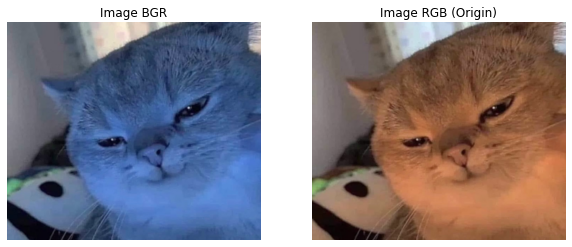

In [68]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title("Image BGR")

fig.add_subplot(1,2,2)
plt.imshow(img1)
plt.axis('off')
plt.title("Image RGB (Origin)")

## 2.Image ROI
#### Vùng quan tâm (Region Of Interest, viết tắt ROI hoặc RoI) là vùng ảnh ta sẽ áp dụng các xử lý / biến đổi trên đó và bỏ qua các vùng còn lại

(600, 700, 3)


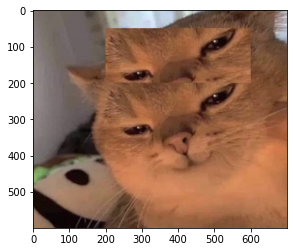

In [69]:
img_2 = img1.copy()
print(img_2.shape)

eyes = img1[200:350,200:600]
img_2[50:200,200:600] = eyes
plt.imshow(img_2)

## 3.Making Borders for Images (Padding)
#### Tạo viền ảnh hoặc ứng dụng khác là zero-padding

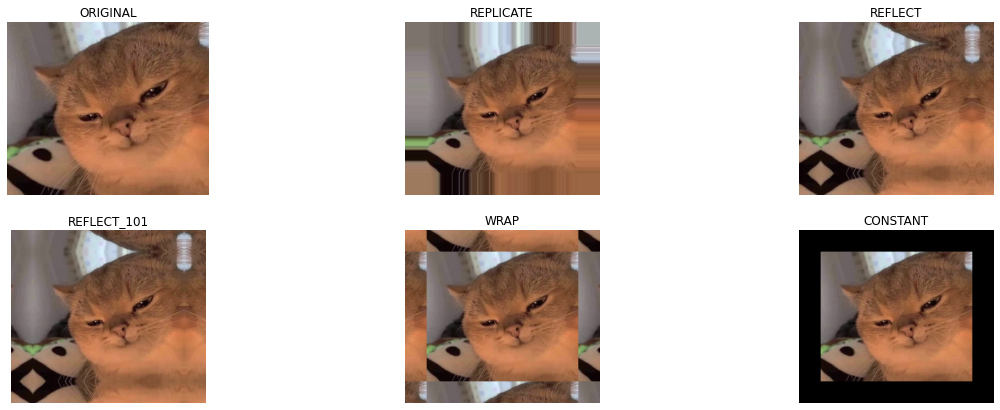

In [70]:
fig = plt.figure(figsize=(20, 7))

replicate = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_CONSTANT)

lib = [img1,replicate,reflect,reflect101,wrap,constant]
title = ['ORIGINAL','REPLICATE','REFLECT','REFLECT_101','WRAP','CONSTANT']
for i in range(1,7):
  plt.subplot(2,3,i)
  plt.imshow(lib[i-1],'Accent')
  plt.title((title[i-1]))
  plt.axis('off')
plt.show()

##4.Bitwise Operations
#### Bao gồm các phép toán bitwise: AND, OR, XOR và NOT
#### Dùng trong trường hợp cần ghép ảnh có xóa background(xóa phông)
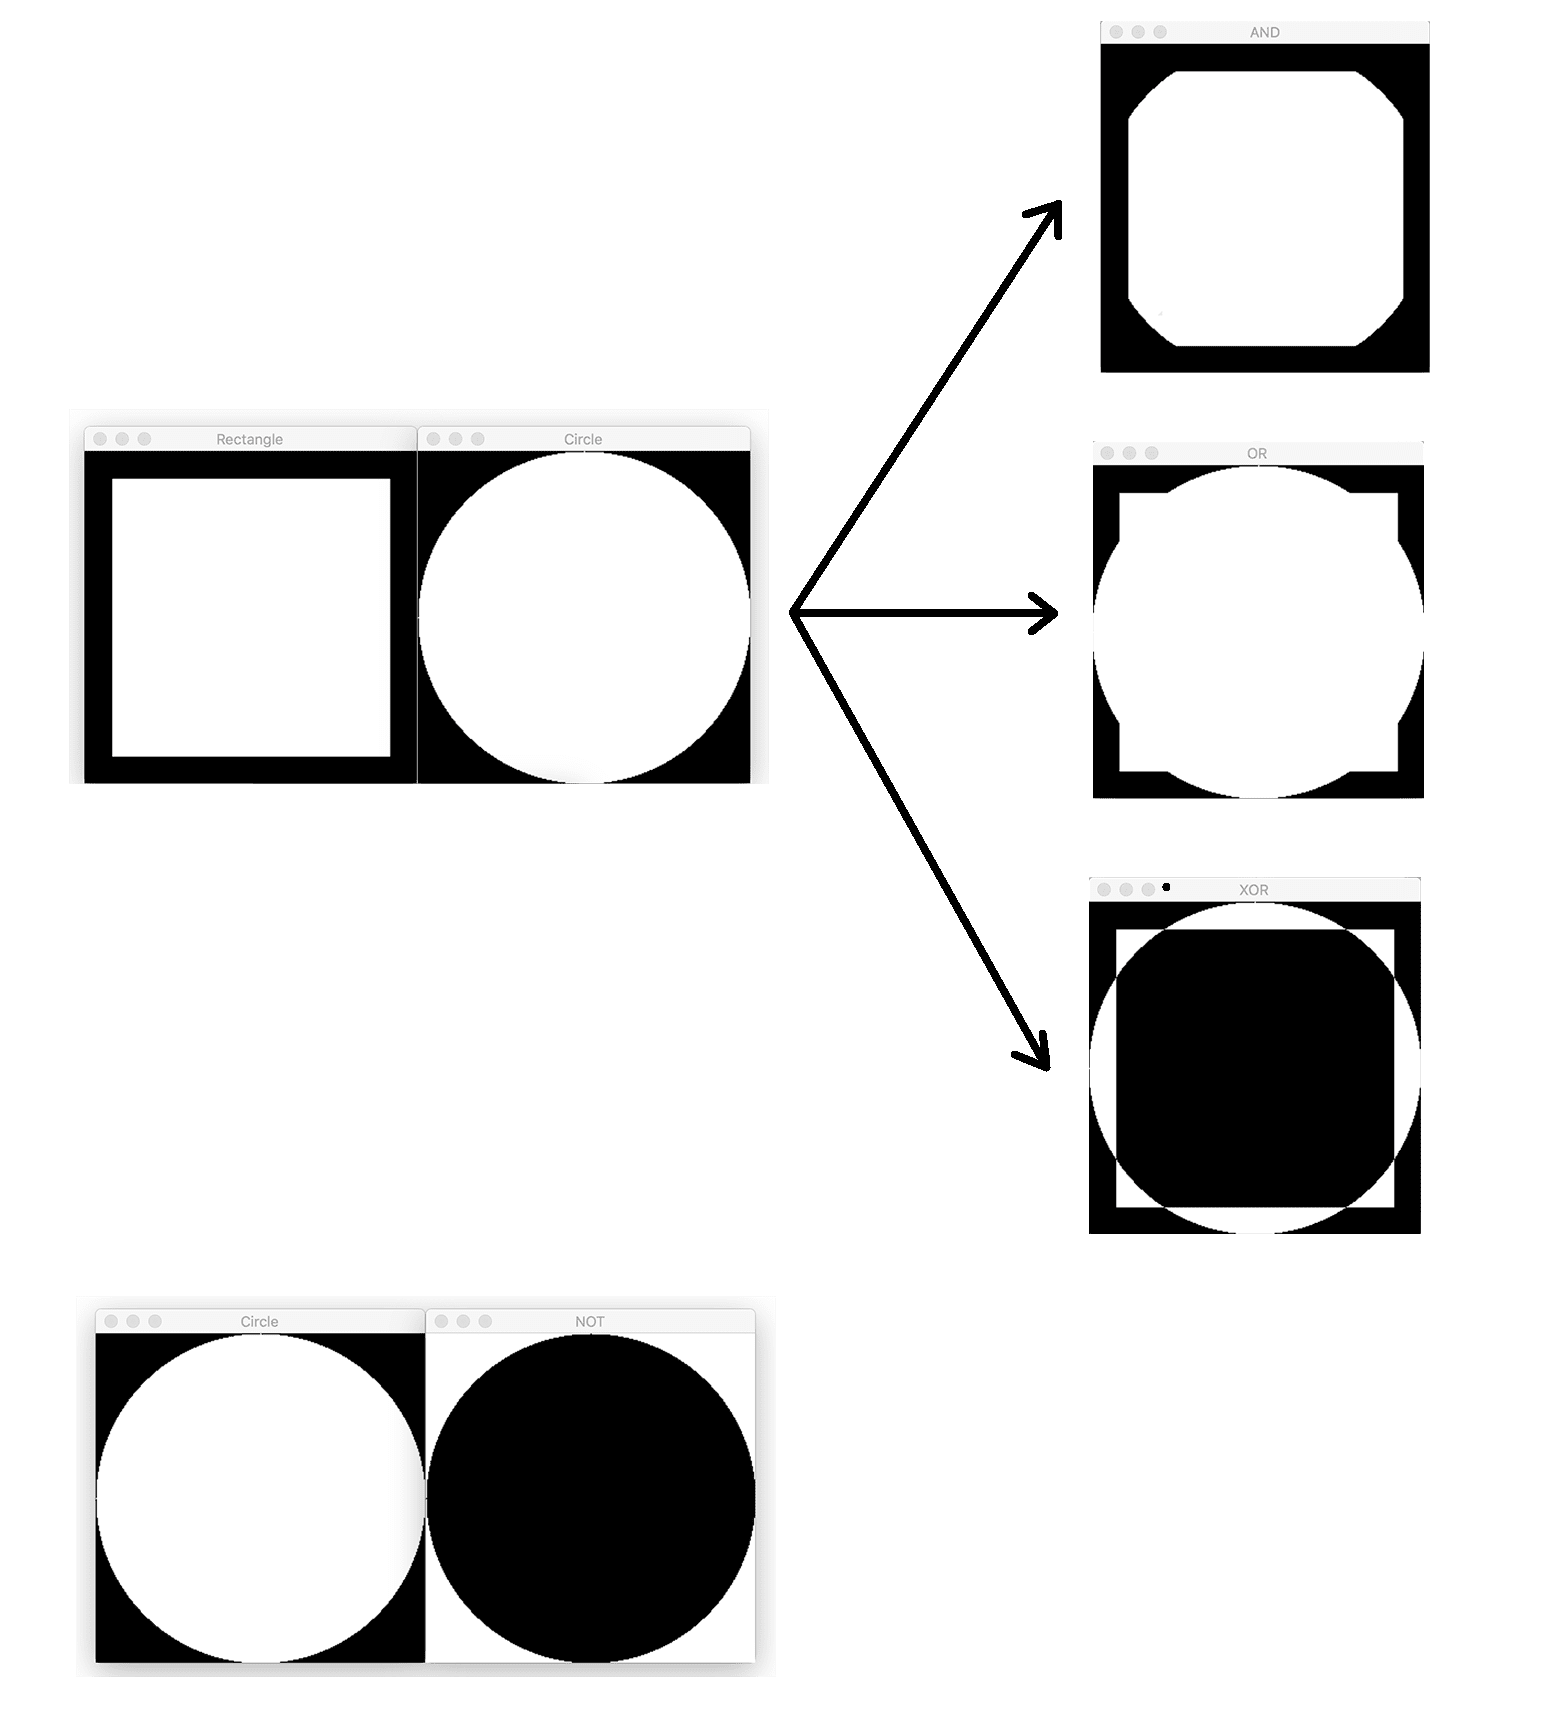

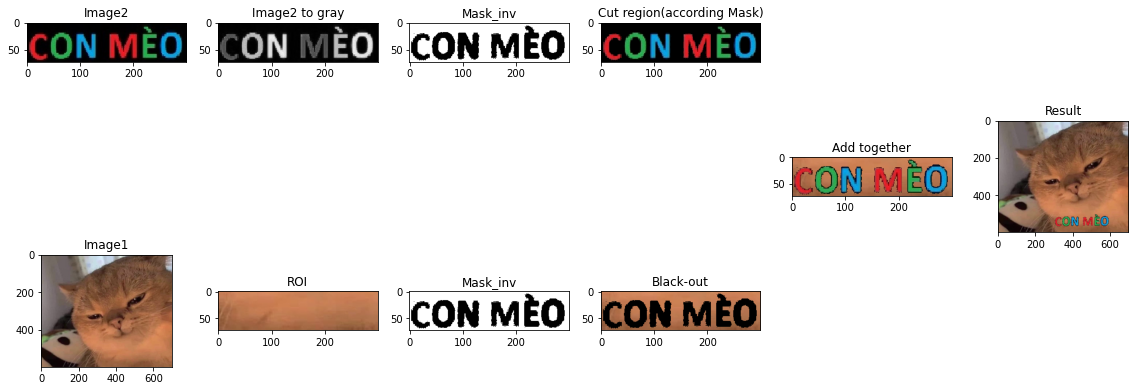

In [71]:
img_blending = img1.copy()
img2 = cv.imread('/content/text.jpg')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Take the roi of image
roi = img_blending[500:500+rows, 300:300+cols]
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)


fig = plt.figure(figsize=(20, 7))
plt.subplot(3,6,13),plt.imshow(img1,'gray'),plt.title('Image1')
plt.subplot(3,6,14),plt.imshow(roi,'gray'),plt.title('ROI')
plt.subplot(3,6,15),plt.imshow(mask_inv,'gray'),plt.title('Mask_inv')
plt.subplot(3,6,16),plt.imshow(img1_bg,'gray'),plt.title('Black-out')
plt.subplot(3,6,1),plt.imshow(img2,'gray'),plt.title('Image2')
plt.subplot(3,6,2),plt.imshow(img2gray,'gray'),plt.title('Image2 to gray')
plt.subplot(3,6,3),plt.imshow(mask_inv,'gray'),plt.title('Mask_inv')
plt.subplot(3,6,4),plt.imshow(img2_fg,'gray'),plt.title('Cut region(according Mask)')
plt.subplot(3,6,11),plt.imshow(dst,'gray'),plt.title('Add together')
img_blending[500:500+rows, 300:300+cols] = dst
plt.subplot(3,6,12),plt.imshow(img_blending,'gray'),plt.title('Result')
plt.show()


# Part II. Image Processing in OpenCV

##1.Changing Colorspaces

In [72]:
# Import image
img3 = cv.imread("/content/ball.jpg")

img3_rgb = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
img3_hsv = cv.cvtColor(img3,cv.COLOR_BGR2HSV)

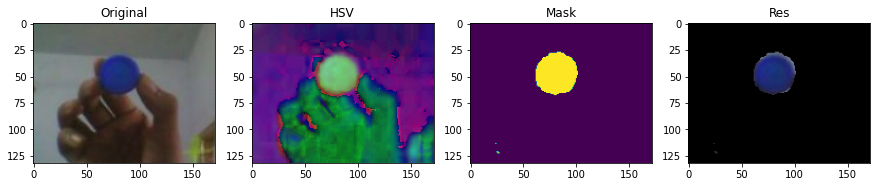

In [73]:
lower_blue = np.array([100,50,50])
upper_blue = np.array([130,255,255])
# Threshold the HSV image to get only blue colors
mask = cv.inRange(img3_hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv.bitwise_and(img3_rgb,img3_rgb, mask= mask)

fig = plt.figure(figsize=(15,7))

plt.subplot(141),plt.imshow(img3_rgb),plt.title('Original')
plt.subplot(142),plt.imshow(img3_hsv),plt.title('HSV')
plt.subplot(143),plt.imshow(mask),plt.title('Mask')
plt.subplot(144),plt.imshow(res),plt.title('Res')
plt.show()

##2.Geometric Transformations of Images

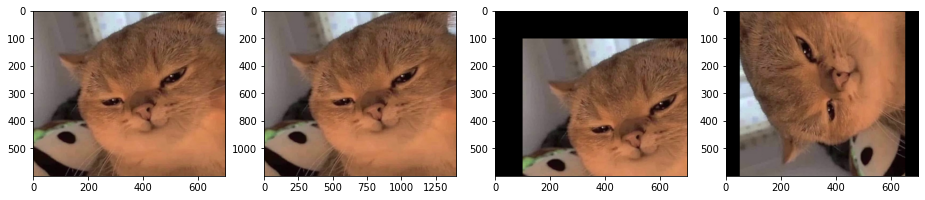

In [74]:
img = img1.copy()

# Scaling
height, width = img.shape[:2]
scaling = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

# Translation
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,100]])
dst = cv.warpAffine(img,M,(cols,rows))

# Rotation
rows,cols = img.shape[:2]
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
rotation = cv.warpAffine(img,M,(cols,rows))


lib=[img,scaling,dst,rotation]
plt.figure(figsize=(20,7))
for i in range(4):
  plt.subplot(1,5,i+1)
  plt.imshow(lib[i],'Accent')
  plt.title('')
  plt.axis('on')
plt.show()

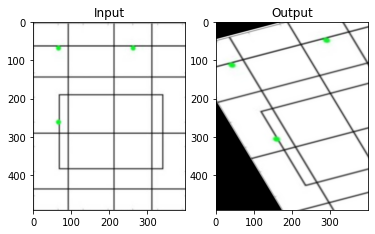

In [75]:
img = cv.imread('/content/affine.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

(880, 880, 3)


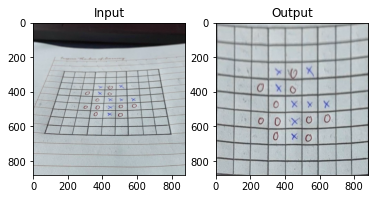

In [76]:
img = cv.imread('/content/caro.jpg')
print(img.shape)

rows,cols,ch = img.shape
pts1 = np.float32([[180,280],[721,271],[70,645],[795,645]])
pts2 = np.float32([[0,0],[880,0],[0,880],[880,880]])

M = cv.getPerspectiveTransform(pts1,pts2)
res = cv.warpPerspective(img,M,(880,880))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(res),plt.title('Output')
plt.show()

##3.Image Thresholding

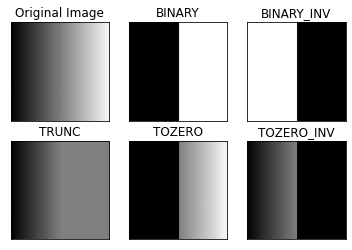

In [77]:
img = cv.imread('/content/thresholding.jpg')

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

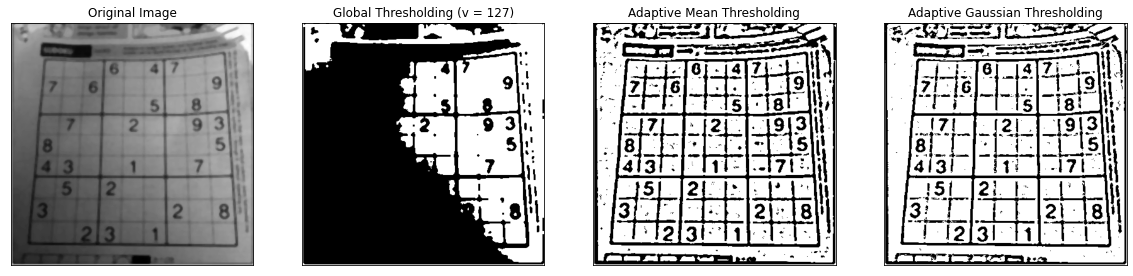

In [78]:
img = cv.imread('/content/carothreshold.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

plt.figure(figsize=(20,7))
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

##4.Smoothing Images

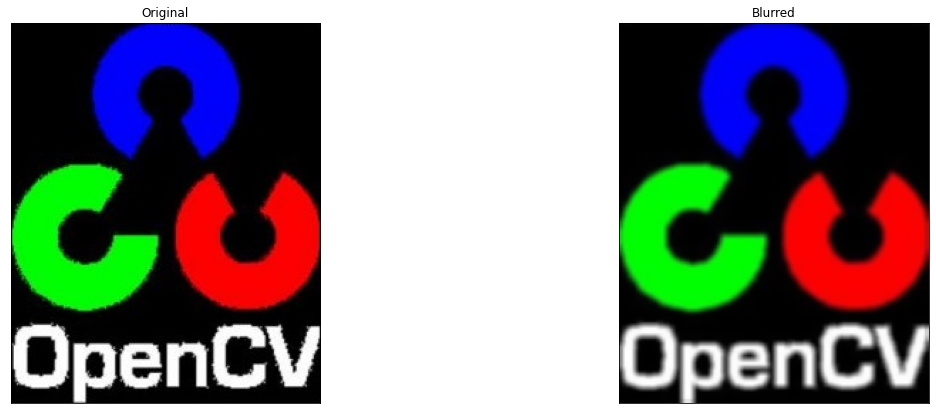

In [79]:
img = cv.imread('/content/blur.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

blur = cv.blur(img,(5,5))

plt.figure(figsize=(20,7))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

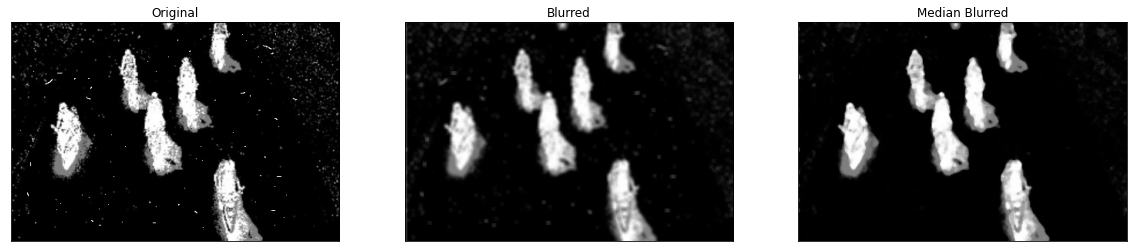

In [80]:
img = cv.imread('/content/mdianblur.jpg')

blur = cv.blur(img,(5,5))
median = cv.medianBlur(img,5)

plt.figure(figsize=(20,7))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

##5.Morphological Transformations

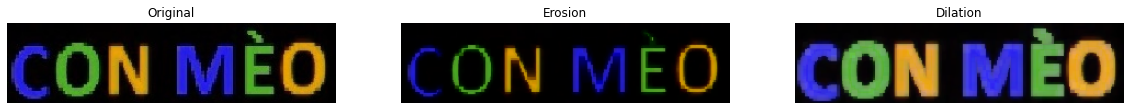

In [81]:
img = cv.imread('/content/text.jpg')

kernel = np.ones((5,5),np.uint8)

erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(20,7))
plt.subplot(131),plt.imshow(img),plt.axis('off'),plt.title('Original')
plt.subplot(132),plt.imshow(erosion),plt.axis('off'),plt.title('Erosion')
plt.subplot(133),plt.imshow(dilation),plt.axis('off'),plt.title('Dilation')
plt.show()

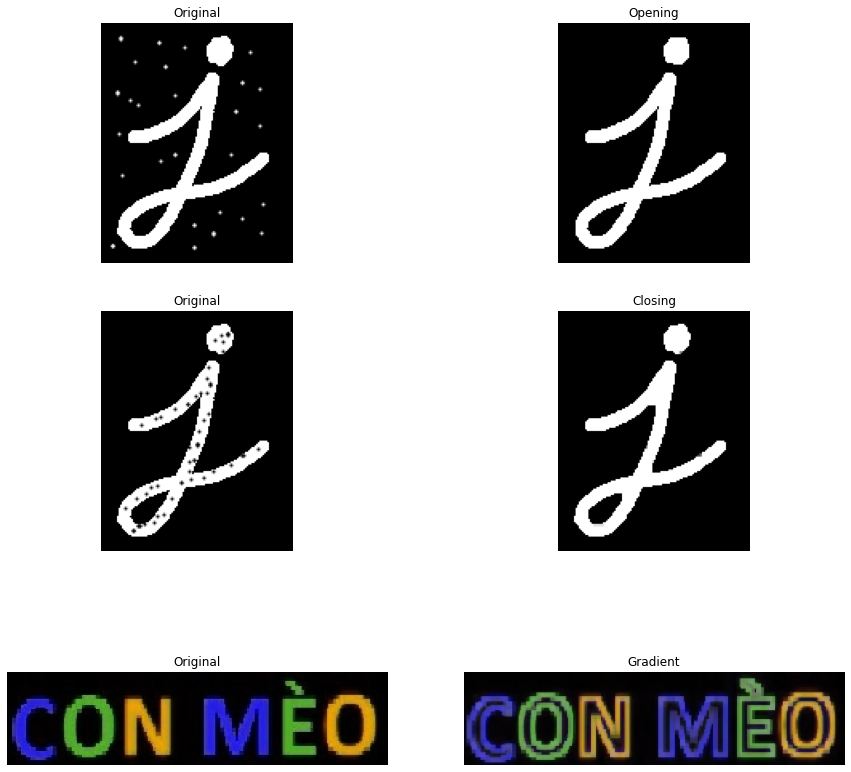

In [82]:
img1 = cv.imread('/content/opening.png')
img2 = cv.imread('/content/closing.png')

kernel = np.ones((5,5),np.uint8)

opening = cv.morphologyEx(img1, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(img1),plt.axis('off'),plt.title('Original')
plt.subplot(322),plt.imshow(opening),plt.axis('off'),plt.title('Opening')
plt.subplot(323),plt.imshow(img2),plt.axis('off'),plt.title('Original')
plt.subplot(324),plt.imshow(closing),plt.axis('off'),plt.title('Closing')
plt.subplot(325),plt.imshow(img),plt.axis('off'),plt.title('Original')
plt.subplot(326),plt.imshow(gradient),plt.axis('off'),plt.title('Gradient')
plt.show()

##6.Edge Detection

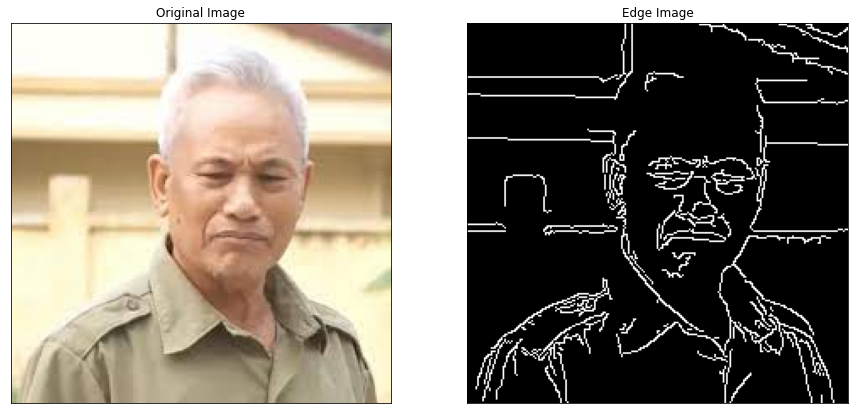

In [83]:
img = cv.imread('/content/bacda.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
edges = cv.Canny(img,100,200)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# *reference: [OpenCV tutorial](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html) 